# Data Analysis

This jupyter notebook demonstrates different ways the Market() class can simulate supplier behaviors. Three topics will be covered:
- How cost affects quantity supplied and revenue
- How competition affects quantity supplied and revenue
- How shifts in demand affect the quantity supplied and revenue
---

## 1. Underlying Scenario

The code underlying the Market() class can be thought of as mimicking the following scenario:
1. There are a given set of buyers with their own demands for a product and a given set of sellers producing that product at a price based on a desired profit margins and cost function.
2. The buyers will take randomized turns go to buy one of the product at the cheapest possible price. If the product runs out or if the available products are too expensive, then the buyer will buy nothing.
3. The sellers will constantly update the amount of goods they produce as to generate the greatest possible profit.

## 2. Imports

The project uses Matplotlib, Numpy, the `Market()` class defined in the `market_class.py` file, and the functions found in the `analysis_functions.py` file:
- Matplotlib: Package that creates visuals for data; used in `market_class.py` and `analysis_functions.py`.
- Numpy: Package that defines the `ndarray` class, which is a list that can perform math easier than a normal list.
- Market(): Class that defines a market with certain companies with different cost equations and profit margins and customers with different needs.
- `analysis_functions.py`: Contains functions `single_company()` and `multiple_companies()`, which use the previously mentioned packages and the Market() class to create charts analyzing the players in a market.

In [1]:
import numpy as np
from definitions.market_class import Market
import definitions.analysis_functions as ana

## 2. Cost on Supply and Revenue

Typically, lower costs lead to greater profits, as the ability for a company gain money from the difference between the selling price and production cost increases. However, if two companies share different costs but the same profit margins, there is a chance that the company which sells at a cheaper price may get a lower profit than the company. This implies that (without assuming competion) to improve the profits possible in a market, a company must produce at a low cost and high profit margin. 

What is consistent is that the quantity needed to be produced to achieve maximum profits increases as selling price lowers.

Illustrating these notes are a couple of companies with different cost equations (where $c$ is cost and $q$ is quantity produced) and profit margins:
1. Company 1: $c = 250q$ at margin of 10%
2. Company 2: $c = 100q$ at margin of 10%
3. Company 3: $c = 100q$ at margin of 175%
4. Company 4: $c = 25q^{2}$ at margin of 10%

In all simulations will be a series of customers with demand along the demand curve of...

$$d = 500 - 5q$$

There will also be three graphs for each simulation:
- A supply and demand graph showing how a company meets demand
- A average profit vs quantity graph showing the average profit made at each quantity produced
- A count of the times a specific quantiy was produced graph showing how many times a certain quantity was produced in the simulation

#### Company 1

With a linear cost equation, the company's supply line stays constant at the value of 275. Also, as Company 1 shifts its quantity produced from a start at 1 to a quantity around 45 (and staying around there), the profit gradually increases max under 1200 before drecreasing once the optimal quantity is passed.

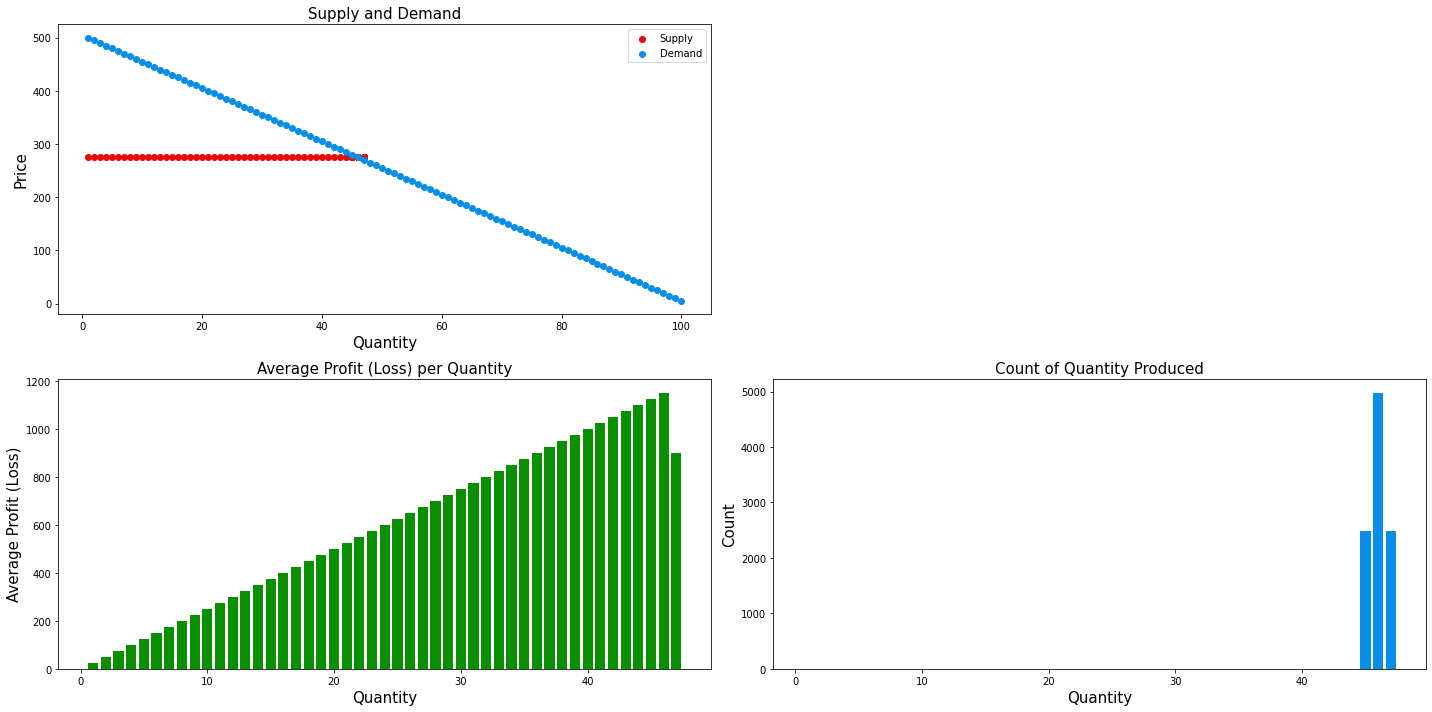

In [2]:
# Defining Market
m1 = Market()
m1.add_buyers(list(np.arange(1, 101)*5))
m1.add_seller('Company 1', lambda q: 250*q, 0.10)

# Creating Chart
ana.single_company(m1)

#### Company 2

Like the supply curve on Company 1, Company 2's supply curve stays at a constant value; this time, the value is about $110. Since the cost of an item stays relatively low, Company 2 is able to produce more goods than Company 1, as more customers are willing to buy a product at $110 than $275. However, the maximum profit Company 2 reaches is a little less than 800 and much less than the max profit of Company 2.

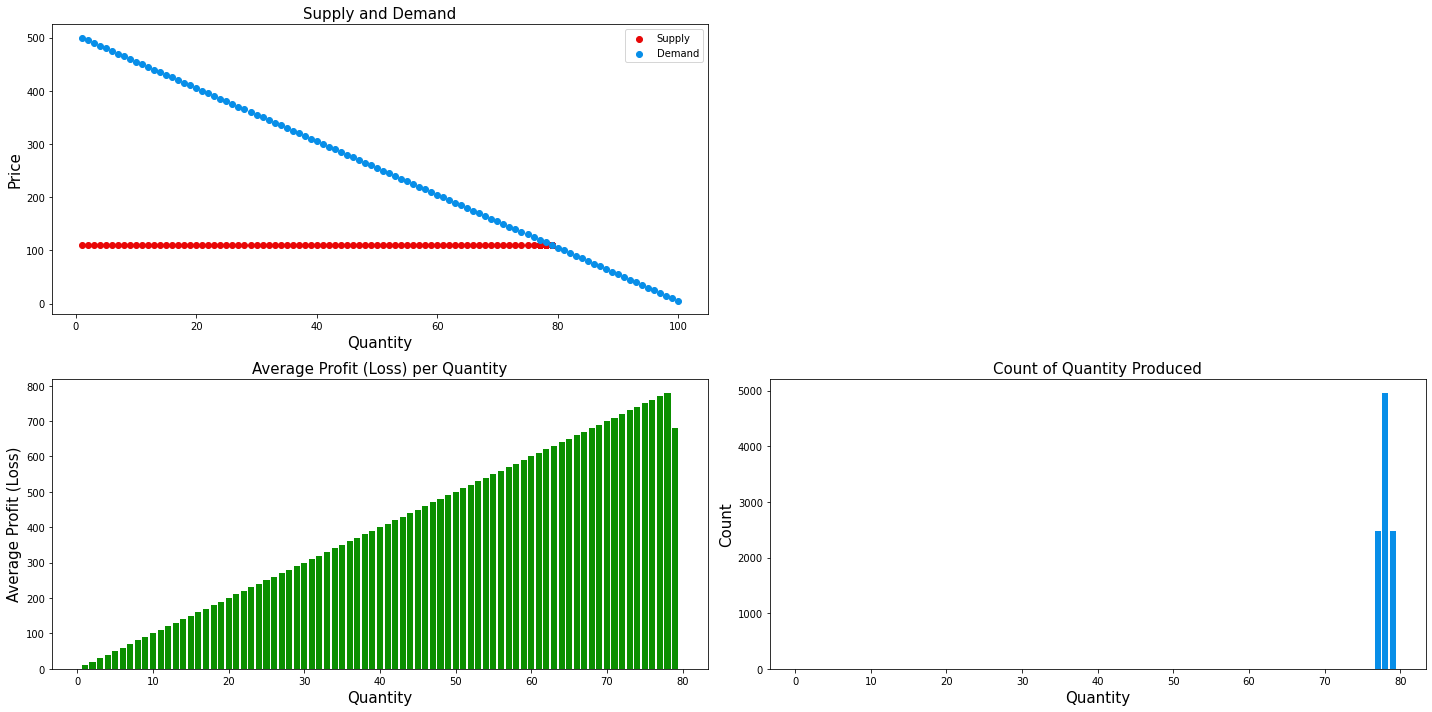

In [3]:
# Defining Market
m1 = Market()
m1.add_buyers(list(np.arange(1, 101)*5))
m1.add_seller('Company 2', lambda q: 100*q, 0.10)

# Creating Chart
ana.single_company(m1)

#### Company 3

Improving the profit of Company 2 would mean improving the profit margin. To show this, Company 3 has the same cost function as Company 2, but a higher profit margin at 175%. This does cause Company 3 to produce less than Company, but it also allows Company 3 to generate agreater profit than Company 1 and Company 2.

In the simulation, a company needs to allow profit margins to change to ensure higher profits, as producing more goods at a cheaper price is not always the most optimal route.

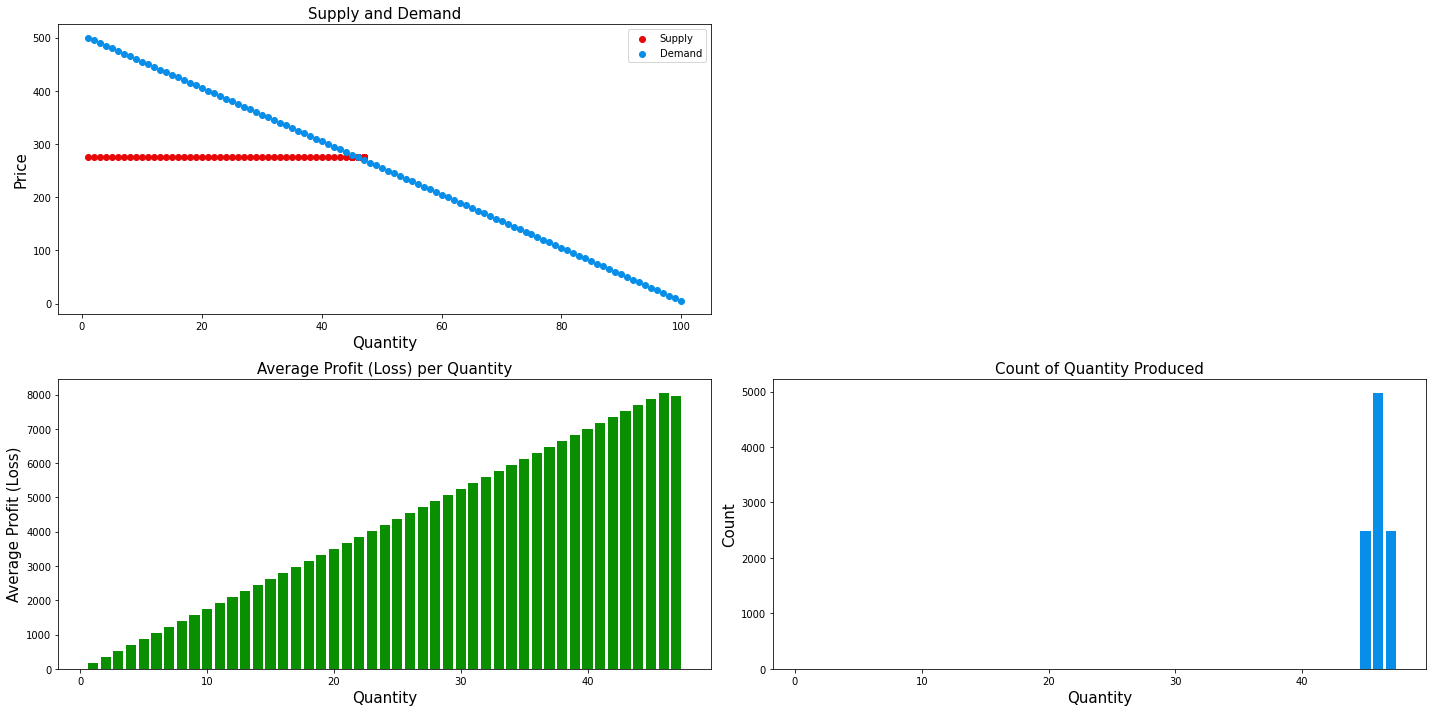

In [4]:
# Defining Market
m1 = Market()
m1.add_buyers(list(np.arange(1, 101)*5))
m1.add_seller('Company 3', lambda q: 100*q, 1.75)

# Creating Chart
ana.single_company(m1)

#### Company 4

Company 4's cost equation starts off as less than the cost equations for Company 1, Company 2, and Company 4, but Company 4 eventually produces more expensive goods, leading to less production and lower profits than Company 1 and Company 2. An interesting fact to note is that Company 4's supply curve is a linear line rather than a consistent value. This curve shows that the average price among all units produce increases with the square equation.

The graph can also be interpreted as showing that marginal costs need to be kept consistent in order to maximize profits, as growing costs only decrease profits and the amount of goods produceable.

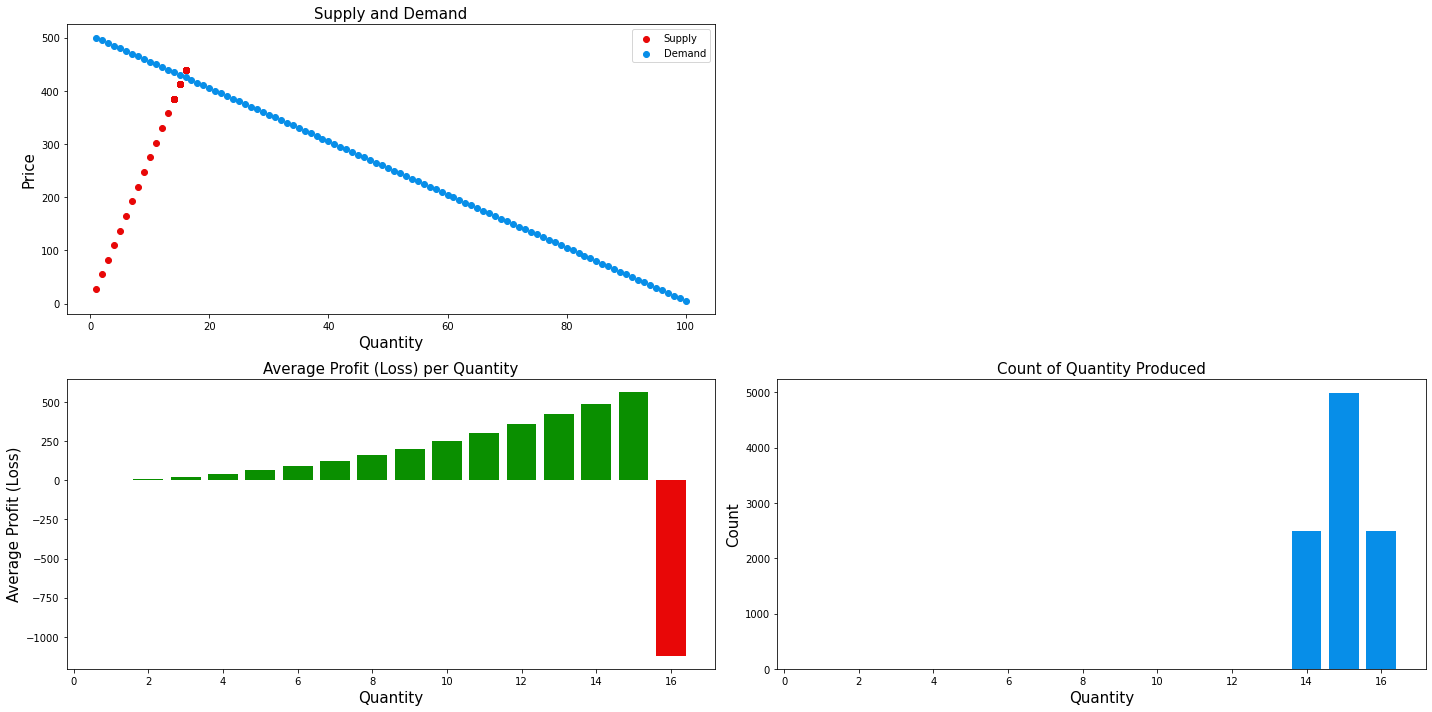

In [5]:
# Defining Market
m1 = Market()
m1.add_buyers(list(np.arange(1, 101)*5))
m1.add_seller('Company 4', lambda q: 25*q**2, 0.10)

# Creating Chart
ana.single_company(m1)

## 3. Competition on Supply and Revenue

The addition of competition can greatly affect how my program's companies optimize profits. Since buyers seek to purchase the cheapest possible product available, it is possible for a company with products selling at a low enough price to absolutely undercut their competitors. Alternatively, there maybe a few dominant companies making great profits while other companies fit into niches and still make some amount of money.

Illustrating this are a series of markets with the following companies and demands:
- Linear Competition: Contains companies with a common profit margin of 10% and different linear cost functions.
    - Company 1: $c = 100q$ at margin of 10%
    - Company 2: $c = 200q$ at margin of 10%
    - Company 3: $c = 300q$ at margin of 10%
    - Demand Curve: $d = 500 - 5q$
- Quadratic Competition: Contains companies with a common profit margin of 10% and different quadratic cost functions.
    - Company 1: $25q^{2}$ at margin of 10%
    - Company 2: $20q^{2}$ at margin of 10%
    - Company 3: $10q^{2}$ at margin of 10%
    - Demand Curve: $d = 500 - 5q$
- Linear and Quadratic Competition: Contains companies with a profit margin of 10% and a mix of linear and quadratic cost functions.
    - Company 2: $10q^{2}$ at margin of 10%
    - Company 4: $100q$ at margin of 10%
    - Demand Curve: $d = 500 - 5q$

Accompanying each simulation are a series of graphs:
- A left supply and demand graphs with supply lines representing the quantiy a company can produce at a certain price and a demand line representing the consumer demand.
- A right supply and demand graph representing the average price of an item in a market when there is a certain quantity being produced by all companies.
- For each company, a profit vs quantity graph and a count of the times a specific quantiy was produced vs quantiy graph.

#### Linear Competition

Linear competition is meant to describe a market where competitors have costs which grow linearly. On the left supply and demand chart, this creates multiple supply curves. On the profit vs quantity and count of the times a specific quantiy was produced vs quantiy graphs, the competition also sees one company which has the lowest cost function absolutely dominate as customers are attracted to low prices. Thus, although the succeeding company may not benefit with high enough profits (as prices are encouraged to stay bellow competition), there is a benefit to low cost functions: market dominance.

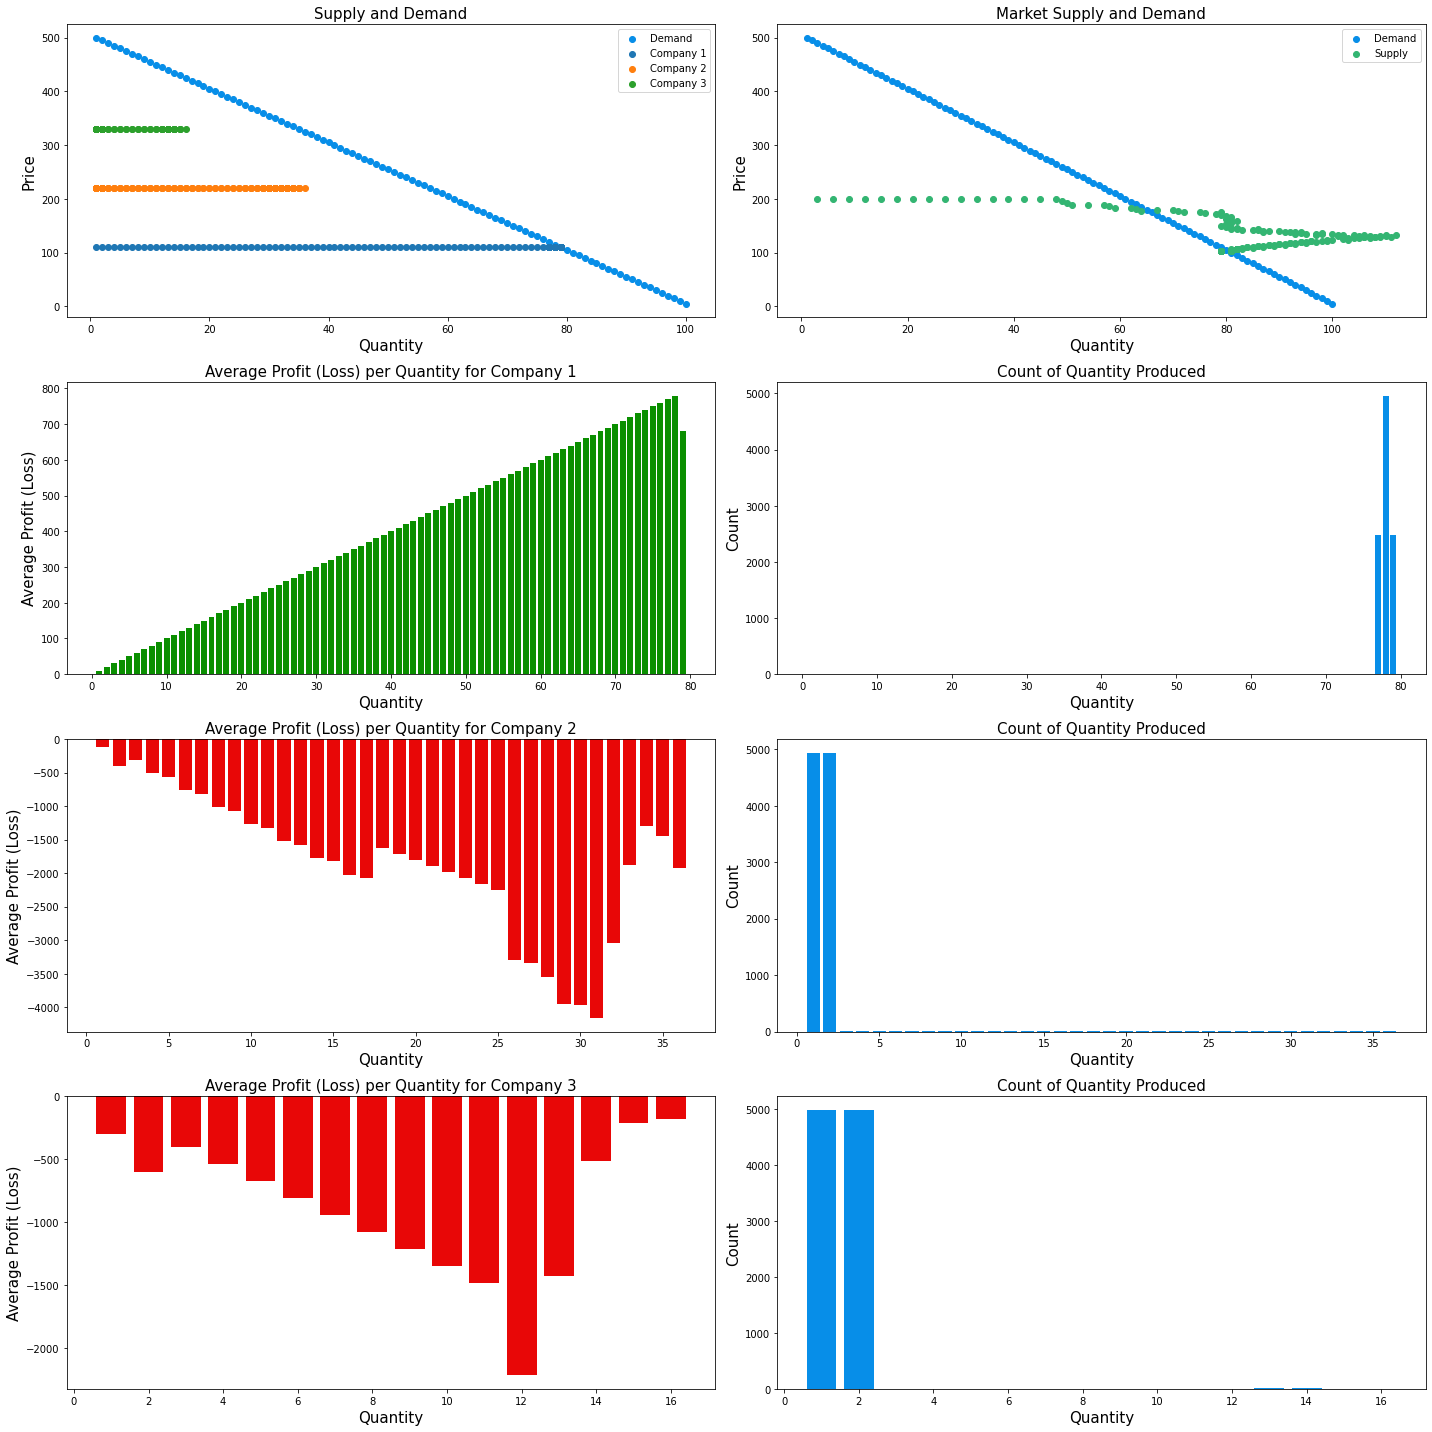

In [6]:
## Define Market
lin = Market()
lin.add_buyers(list(np.arange(1, 101)*5))
lin.add_seller('Company 1', lambda q: 100*q, 0.10)
lin.add_seller('Company 2', lambda q: 200*q, 0.10)
lin.add_seller('Company 3', lambda q: 300*q, 0.10)

# Creating Chart
ana.multiple_companies(lin)

#### Quadratic Competition

Quadratic competition involves companies with quadratic cost functions. Like linear competition, companies deal with lower potential profits compared to cases without competition (for instance a cost equation of $25q^{2}$ and margin of 10% would create a profit less than the normal 500 in cases without competition). Also, the company that provides products at the lowest price dominates. However, unlike linear competition, a dominating company does not take all consumers; there are other companies which produce goods to create their own small profits. This is because linear growth allows a company to appeal to more customers without raising the average cost of goods; meanwhile, quadratic growth raises the average price of a product with every quantity produce, meaning that less customers are willing to by a good as quantity is produced and that there are leftover customers who are willing to buy other products as the dominating brand becomes too expensive.

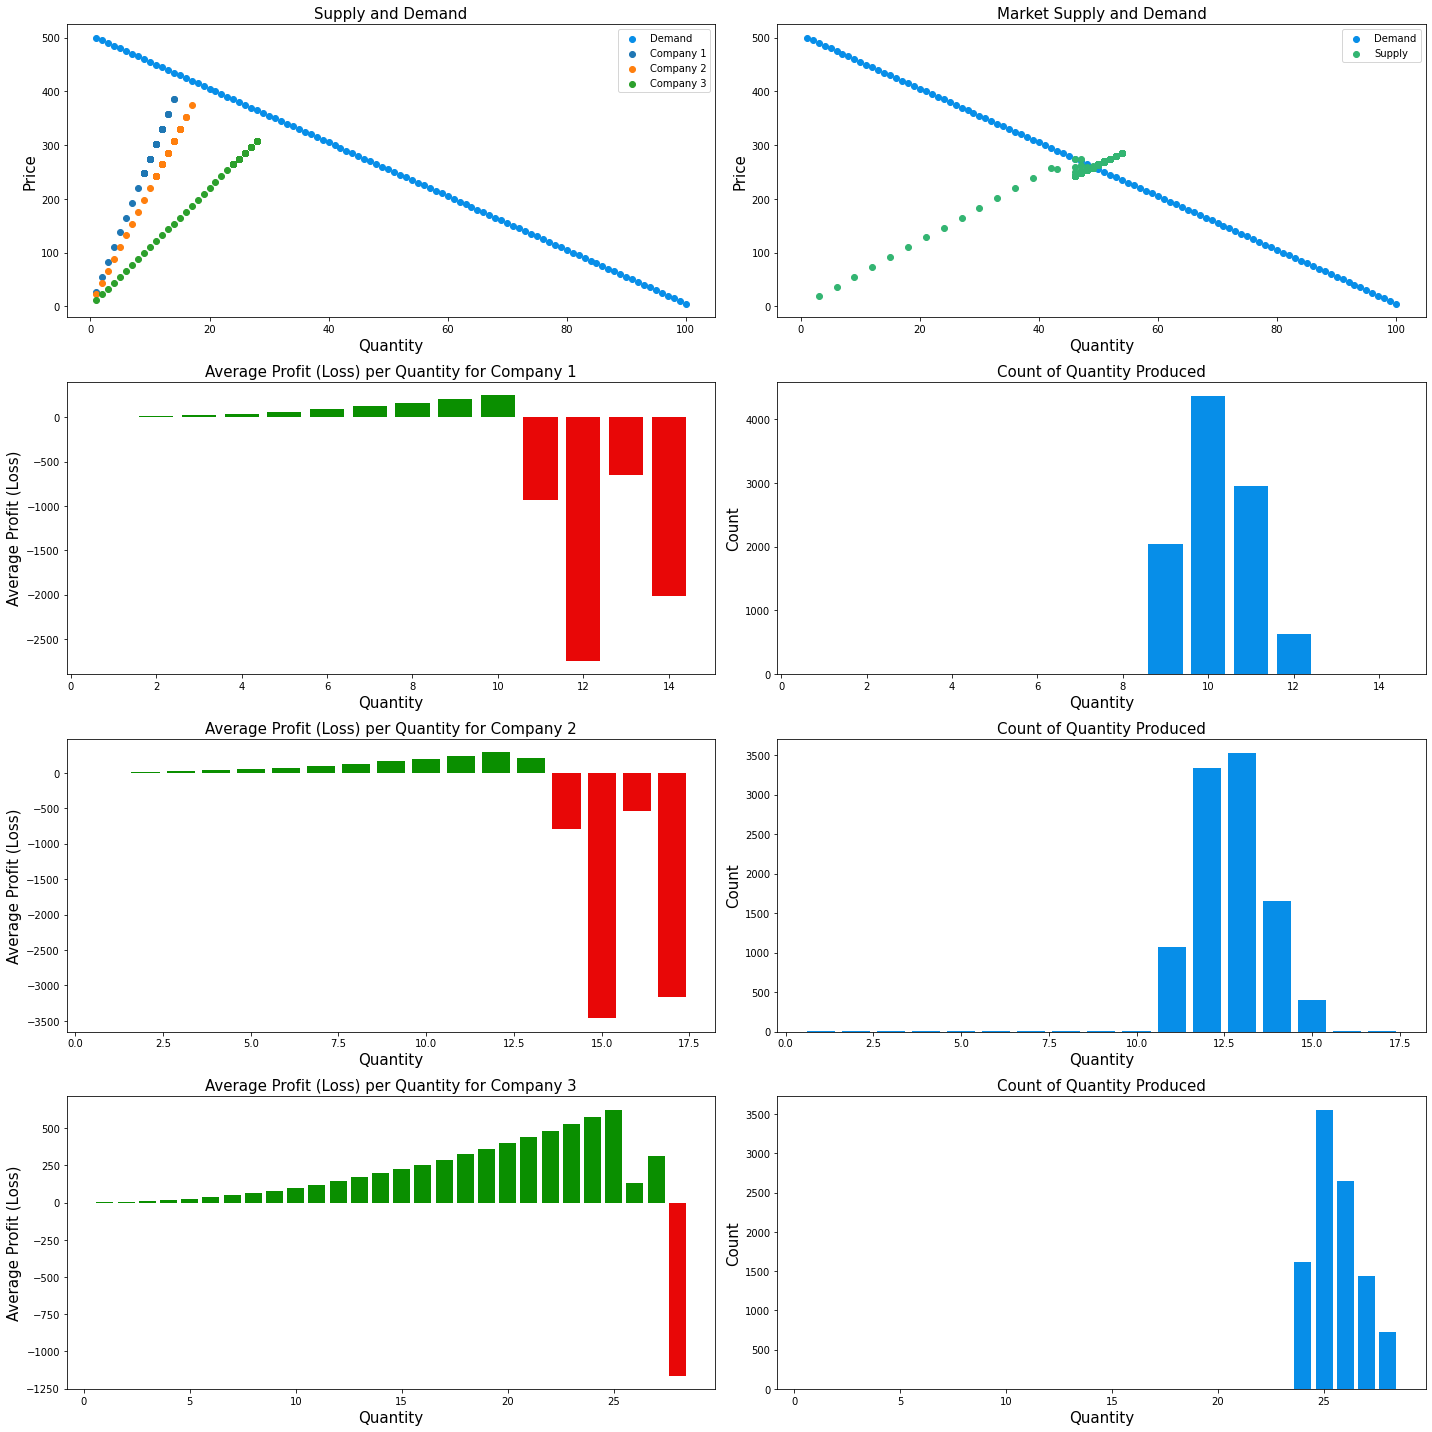

In [7]:
## Define Market
m1 = Market()
m1.add_buyers(list(np.arange(1, 101)*5))
m1.add_seller('Company 1', lambda q: 25*q**2, 0.10)
m1.add_seller('Company 2', lambda q: 20*q**2, 0.10)
m1.add_seller('Company 3', lambda q: 10*q**2, 0.10)

# Creating Chart
ana.multiple_companies(m1)

#### Linear and Quadratic Competition

For this linear and quadratic competition example, I put companies 2 and 4 from the Cost on Supply and Revenue section into a market to compete. When the companies start at producing 1 produce each, Company 2 is able to produce cheaper products than Company 4. But, as more goods are produced, Company 4's products begin to rise in price, allowing Company 2 to create its own niche producing goods at quantities where Company 4 is more expensive. Company 4 creates its own niche at quantities where its products are cheaper than Company 2's products.

The outcome of this niche setting are lower profits for both companies and a decrease in the quantity produced for Company 2.

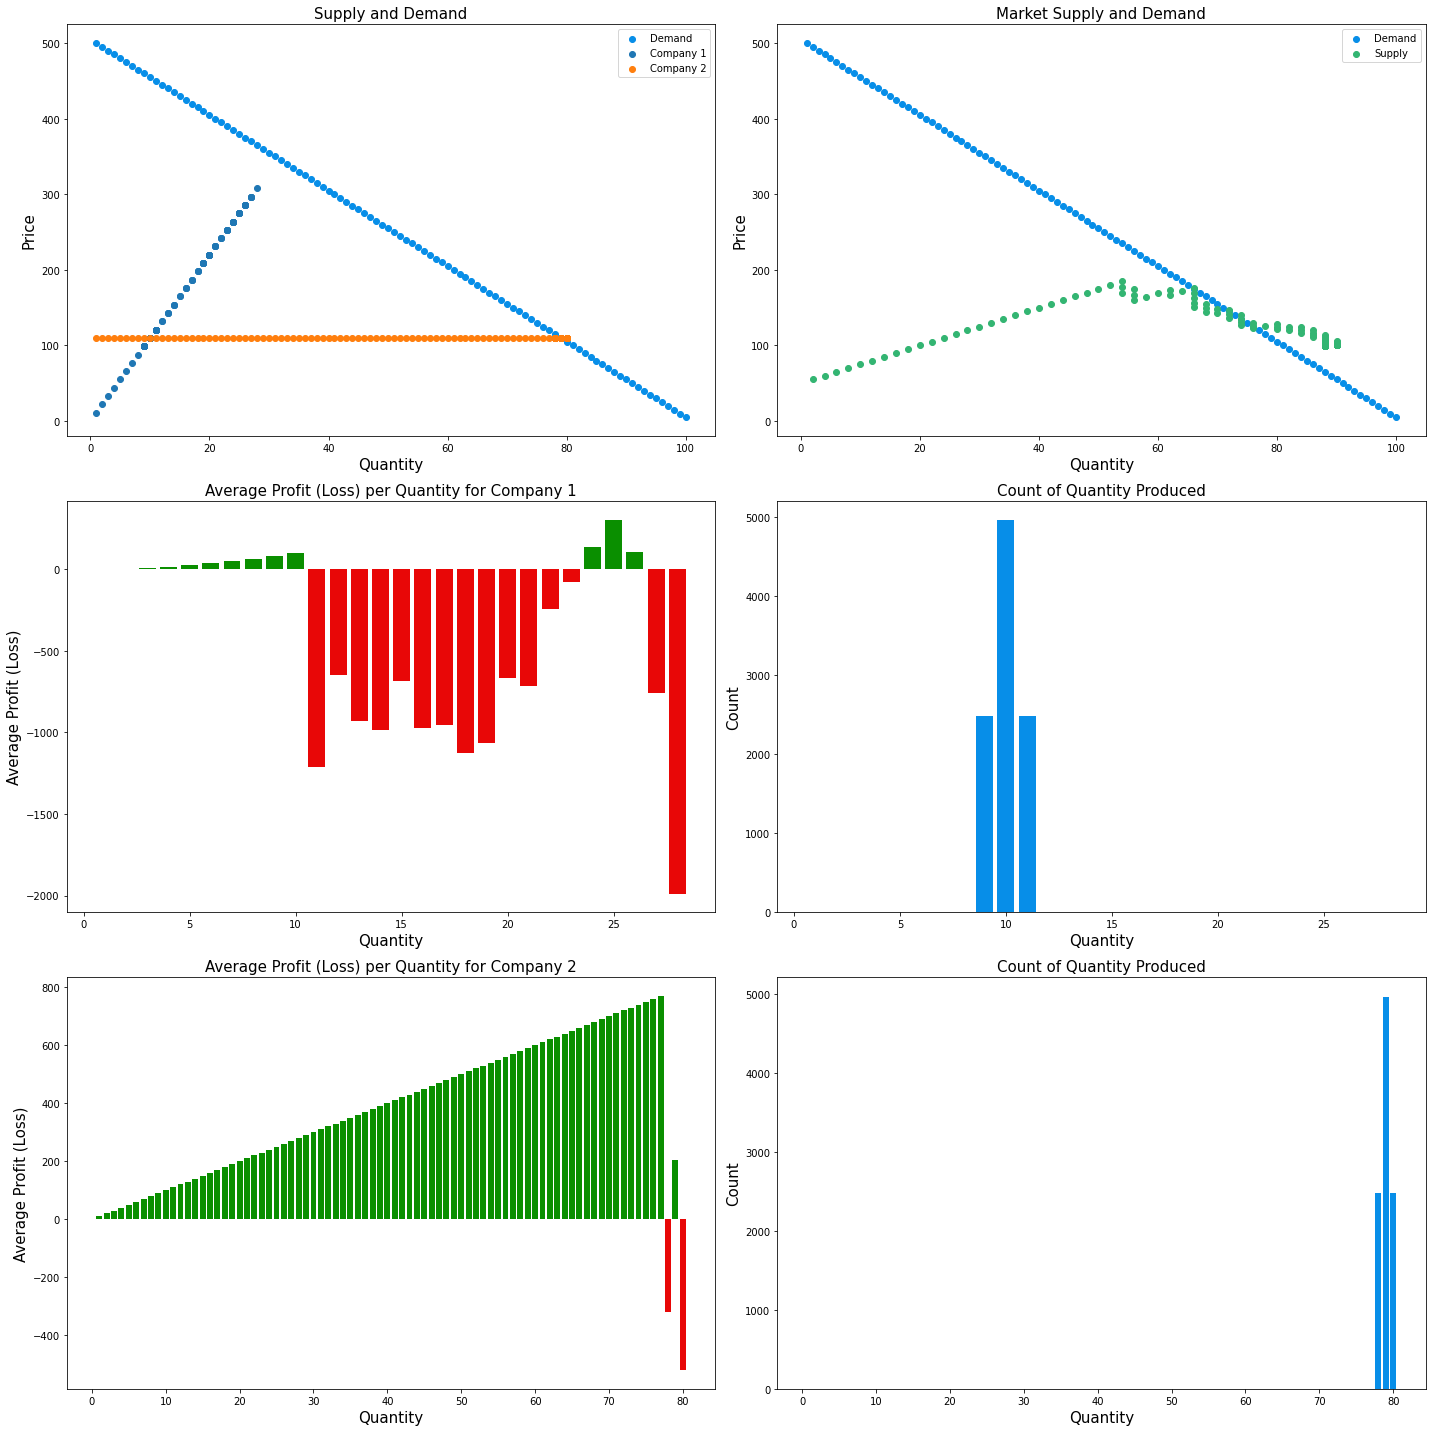

In [8]:
## Define Market
m1 = Market()
m1.add_buyers(list(np.arange(1, 101)*5))
m1.add_seller('Company 2', lambda q: 10*q**2, 0.10)
m1.add_seller('Company 4', lambda q: 100*q, 0.10)

# Creating Chart
ana.multiple_companies(m1)